# Insurance Customer Response Prediction Analysis

<font size="+3" color='#053c96'><b> Problem Statement</b></font>

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<font size="+3" color='#053c96'><b>This Notebook will cover - </b></font>
### 1. Exploratory Data Analysis
### 2. Data Modelling and Evaluation

## Step 1: Importing Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns # For creating plots


## Step 2: Load Dataset

In [2]:
data=pd.read_csv('data.csv')

## Step 3: Data Preprocessing & EDA

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool

<Axes: xlabel='count', ylabel='Gender'>

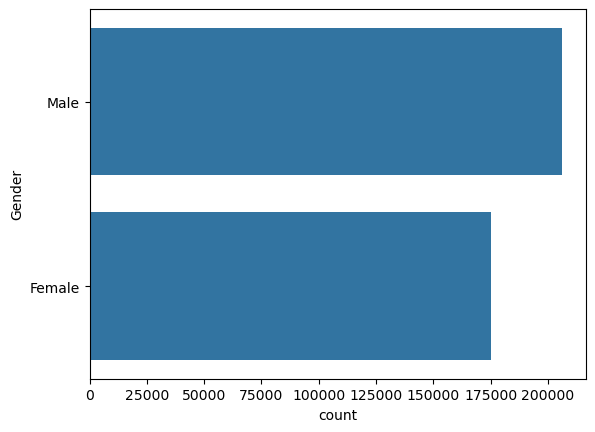

In [8]:
sns.countplot(data.Gender)

In [9]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


In [10]:
df.head()

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


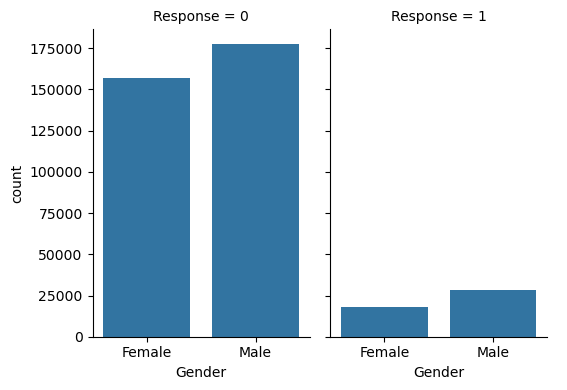

In [11]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [12]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [13]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


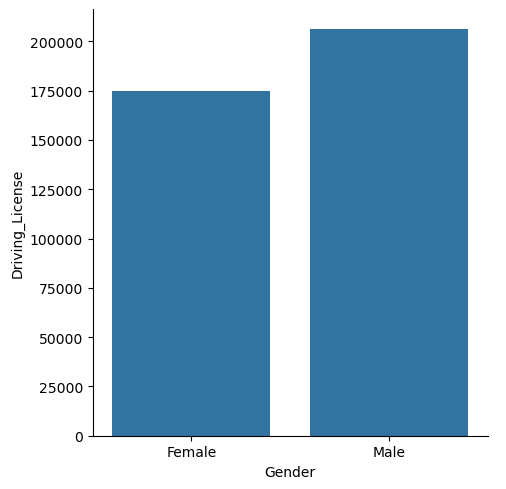

In [14]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

<Axes: xlabel='count', ylabel='Vehicle_Age'>

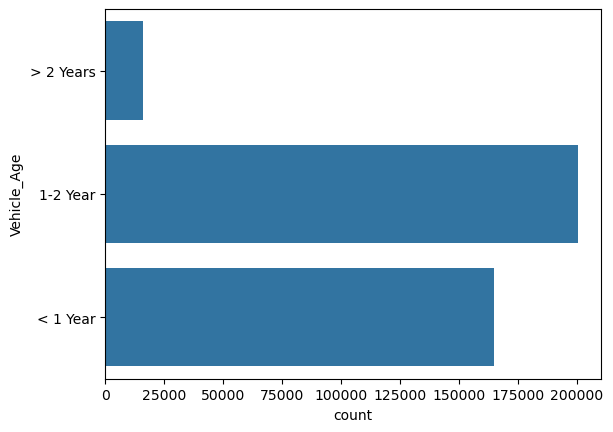

In [15]:
# Vehicle Age 

sns.countplot(data.Vehicle_Age)

In [16]:
# Response and Vehicle age

df=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


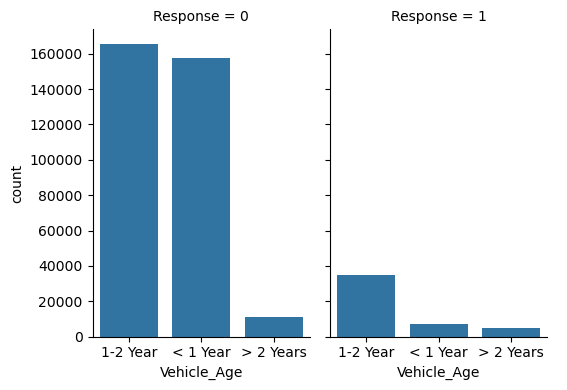

In [17]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);


<Axes: xlabel='count', ylabel='Vehicle_Damage'>

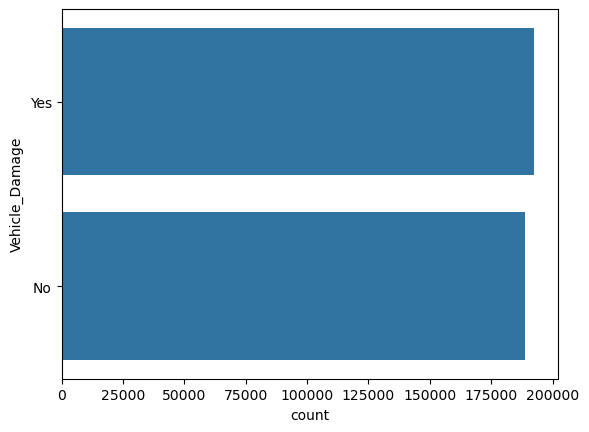

In [18]:
# Customers having damaged vehicle

sns.countplot(data.Vehicle_Damage)

## Step 4: Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing 
- Random Forest,
- Logistic Regression, 
- Decision Tree Classifier

and compare them

# Random Forest Classifier

In [19]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder


# split dataset for training and testing

In [20]:
# Encode categorical variables
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
encoder = LabelEncoder()
for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

In [21]:
# Define features (X) and target (y)
X = data.drop(['id', 'Response'], axis=1)
y = data['Response']


In [22]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
r_model = RandomForestClassifier(n_estimators=100, random_state=42)
r_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred = r_model.predict(X_test)
y_pred_proba = r_model.predict_proba(X_test)[:, 1]  # For ROC-AUC


In [25]:
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
 [[64770  1929]
 [ 8404  1119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.12      0.18      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.54      0.55     76222
weighted avg       0.82      0.86      0.83     76222


ROC-AUC Score: 0.8371841045835812


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [27]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
# 3. Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [29]:
# 4. Make predictions
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC

In [30]:
# 5. Evaluate Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
 [[66636    63]
 [ 9519     4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.06      0.00      0.00      9523

    accuracy                           0.87     76222
   macro avg       0.47      0.50      0.47     76222
weighted avg       0.77      0.87      0.82     76222


ROC-AUC Score: 0.8236515163609894


# Decision Tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, confusion_matrix

In [39]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Make predictions
y_pred = clf.predict(X_test)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [42]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.8221117262732545

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.30      0.31      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.82     76222



# Support Vector Machine Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [45]:
# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Initialize and train the SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42, class_weight='balanced')  # 'balanced' handles class imbalance
svm_clf.fit(X_train, y_train)
